In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from package import euklid as eu


In [2]:
path ="../bitcoin.csv"

In [3]:
yahoo_df = pd.read_csv('bitcoin.csv')

In [4]:
# Add indicators
yahoo_df['vwap'] = eu.vwap(yahoo_df['Close'], yahoo_df['Volume'])
yahoo_df['SO'] = eu.Stochastic_Oscillator(yahoo_df['Close'])
yahoo_df['RSI'] = eu.rsi(yahoo_df['Close'],14)
eu.macd(yahoo_df,yahoo_df['Close'])

# Select valid data
yahoo_df = yahoo_df[35:]

# Normalize

In [5]:
days_ahead = 1
differenced = (yahoo_df['Close'] - yahoo_df['Close'].shift(days_ahead))/(yahoo_df['Close'].shift(days_ahead))[days_ahead:]
previous_differenced = differenced.shift(1)
yahoo_df["Previous_differenced"] = previous_differenced
yahoo_df["Differenced"] = differenced
yahoo_df = yahoo_df[days_ahead+1:]
yahoo_df.tail()

<ipython-input-5-1914be6a00e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df["Previous_differenced"] = previous_differenced
<ipython-input-5-1914be6a00e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df["Differenced"] = differenced


,Date,Adj Close,Close,High,Low,Open,Volume,SO,RSI,vwap,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Previous_differenced,Differenced
2701,2022-02-08,44118.445312,44118.445312,45293.867188,42807.835938,43854.652344,33079398868,100.000000,62.421456,39494.621244,94.777024,1056.309290,-961.532266,0.033666,0.006345
2702,2022-02-09,44338.796875,44338.796875,44727.800781,43232.968750,44096.703125,23245887300,100.000000,63.047625,40024.256036,371.286887,1066.255322,-694.968435,0.006345,0.004995
2703,2022-02-10,43565.113281,43565.113281,45661.171875,43402.808594,44347.800781,32142048537,89.524733,59.328619,40650.868529,521.976130,973.555652,-451.579522,0.004995,-0.017449
2704,2022-02-11,42407.937500,42407.937500,43810.832031,42114.539062,43571.128906,26954925781,73.857184,54.204786,41046.413687,541.778738,794.686608,-252.907870,-0.017449,-0.026562
2705,2022-02-12,42244.468750,42244.468750,42992.550781,41852.574219,42412.300781,18152390304,71.643903,53.505384,41325.359544,538.079243,632.789690,-94.710448,-0.026562,-0.003855


In [6]:
# Try to make predictions on up or down
# def up_down(price):
#     up_down = [np.nan]
#     for i in range(1,len(price)):
#         if price[i] > price[i-1]:
#             up_down.append(1)
#         else:
#             up_down.append(0)
#     return up_down
# yahoo_df['up_down'] = up_down(list(yahoo_df['Close']))
# yahoo_df

<AxesSubplot:>

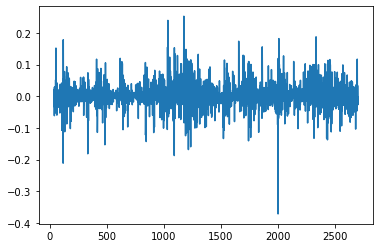

In [7]:
price = yahoo_df['Differenced'] 
price.plot()

In [8]:
#yahoo_df = yahoo_df.iloc[days_ahead:,:]
yahoo_df = yahoo_df.drop(columns = ['Volume', 'vwap']) #'KAMA','OBV','T3'])
close = yahoo_df['Close']
yahoo_df = yahoo_df.iloc[:,6:-1].shift(-1)
yahoo_df = yahoo_df.iloc[:-1,:]

In [9]:
yahoo_df.values

array([[ 0.00000000e+00,  2.81463675e+01, -7.74575918e+00,
        -1.02447256e+00, -6.72128662e+00, -2.00858130e-04],
       [ 1.38678223e+01,  3.14810921e+01, -8.50184093e+00,
        -1.42444345e+00, -7.07739748e+00, -3.09031941e-02],
       [ 1.06681425e+01,  3.11240099e+01, -9.13413442e+00,
        -1.64538955e+00, -7.48874487e+00,  2.14040735e-02],
       ...,
       [ 8.95247328e+01,  5.93286192e+01,  5.21976130e+02,
         9.73555652e+02, -4.51579522e+02,  4.99454505e-03],
       [ 7.38571840e+01,  5.42047861e+01,  5.41778738e+02,
         7.94686608e+02, -2.52907870e+02, -1.74493592e-02],
       [ 7.16439034e+01,  5.35053842e+01,  5.38079243e+02,
         6.32789690e+02, -9.47104476e+01, -2.65619826e-02]])

In [10]:
# convert series to supervised learning
values = yahoo_df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
values

array([[ 0.0000000e+00,  2.8146368e+01, -7.7457590e+00, -1.0244726e+00,
        -6.7212868e+00, -2.0085814e-04],
       [ 1.3867823e+01,  3.1481092e+01, -8.5018406e+00, -1.4244435e+00,
        -7.0773973e+00, -3.0903194e-02],
       [ 1.0668142e+01,  3.1124010e+01, -9.1341343e+00, -1.6453896e+00,
        -7.4887447e+00,  2.1404073e-02],
       ...,
       [ 8.9524734e+01,  5.9328621e+01,  5.2197614e+02,  9.7355566e+02,
        -4.5157953e+02,  4.9945451e-03],
       [ 7.3857185e+01,  5.4204784e+01,  5.4177875e+02,  7.9468658e+02,
        -2.5290787e+02, -1.7449358e-02],
       [ 7.1643906e+01,  5.3505383e+01,  5.3807922e+02,  6.3278967e+02,
        -9.4710449e+01, -2.6561983e-02]], dtype=float32)

# Train, test, val

In [11]:
# split into train and test sets
n_train_days = int(round(yahoo_df.shape[0]*0.8))

In [12]:
train = values[:n_train_days, :]
test = values[n_train_days:, :]
close_train = list(close)[:n_train_days]
close_test = list(close)[n_train_days:]

In [13]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [14]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2134, 1, 5) (2134,) (534, 1, 5) (534,)


# LSTM

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [16]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'loss', patience = 7)

# Set the optimizer
adam = tf.optimizers.Adam(learning_rate = 0.0001)

Epoch 1/500
43/43 - 1s - loss: 0.2733 - 1s/epoch - 29ms/step
Epoch 2/500
43/43 - 0s - loss: 0.1832 - 76ms/epoch - 2ms/step
Epoch 3/500
43/43 - 0s - loss: 0.1234 - 68ms/epoch - 2ms/step
Epoch 4/500
43/43 - 0s - loss: 0.0946 - 59ms/epoch - 1ms/step
Epoch 5/500
43/43 - 0s - loss: 0.0778 - 65ms/epoch - 2ms/step
Epoch 6/500
43/43 - 0s - loss: 0.0692 - 64ms/epoch - 1ms/step
Epoch 7/500
43/43 - 0s - loss: 0.0630 - 62ms/epoch - 1ms/step
Epoch 8/500
43/43 - 0s - loss: 0.0579 - 65ms/epoch - 2ms/step
Epoch 9/500
43/43 - 0s - loss: 0.0539 - 58ms/epoch - 1ms/step
Epoch 10/500
43/43 - 0s - loss: 0.0503 - 63ms/epoch - 1ms/step
Epoch 11/500
43/43 - 0s - loss: 0.0479 - 75ms/epoch - 2ms/step
Epoch 12/500
43/43 - 0s - loss: 0.0462 - 77ms/epoch - 2ms/step
Epoch 13/500
43/43 - 0s - loss: 0.0448 - 73ms/epoch - 2ms/step
Epoch 14/500
43/43 - 0s - loss: 0.0434 - 72ms/epoch - 2ms/step
Epoch 15/500
43/43 - 0s - loss: 0.0424 - 75ms/epoch - 2ms/step
Epoch 16/500
43/43 - 0s - loss: 0.0412 - 74ms/epoch - 2ms/step
Ep

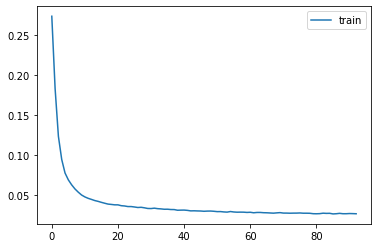

In [17]:
# design network
model = Sequential()
model.add(LSTM(75, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer=adam)
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=50, verbose=2, shuffle=False,  callbacks = [esm])
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Prediction 

In [18]:
predict = model.predict(test_X)
predict = [float(predict[i]) for i in range(len(predict))]
predict[:10]

[-0.01075352169573307,
 -0.008225129917263985,
 0.03462325781583786,
 0.03397064283490181,
 0.22071613371372223,
 -0.022799717262387276,
 -0.05321904271841049,
 -0.06081472337245941,
 -0.0035597658716142178,
 0.027243122458457947]

In [19]:
def ud_pred(pred, actual):
    up_down = [1]
    for i in range(1,len(pred)):
        if pred[i] > actual[i-1]:
            up_down.append(1)
        else:
            up_down.append(0)
    return up_down

def ud(predict):
    up_down = [1]
    for i in range(1,len(predict)):
        if predict[i] > predict[i-1]:
            up_down.append(1)
        else:
            up_down.append(0)
    return up_down

In [20]:
# Scale back predictions
def scale_back(pred, close):
    predict = [close[0]]
    for i in range(1,len(pred)):
        predict.append(pred[i]+list(close)[i-1])
    return predict

def scale_back_pct(pred, close):
    predict = [close[0]]
    for i in range(1,len(pred)):
        predict.append(pred[i]*list(close)[i-1]+list(close)[i-1])
    return predict

In [21]:
pred = scale_back_pct(predict, close_test)
pred

[11323.3974609375,
 11230.261045716472,
 11942.138953339309,
 11897.760843401302,
 14296.424152621854,
 11414.50091198225,
 11333.421108142138,
 10719.892848486008,
 10208.82601683982,
 10798.18809836496,
 11058.609240326557,
 10108.050581764255,
 9769.933665997909,
 10106.22398713736,
 10243.534828501504,
 10840.414686307035,
 10718.75268448107,
 10614.541288854212,
 9896.8587131503,
 10056.403510527889,
 11428.354323655527,
 11715.501424970505,
 10951.285216286418,
 11195.217365534802,
 9068.269107816945,
 9561.848860299797,
 10020.125228021614,
 9067.911933005133,
 9431.931534687865,
 10354.338255366805,
 9974.439511378543,
 9932.654047274802,
 9619.413167119288,
 9801.33756502028,
 10390.136886896915,
 10471.941851622003,
 10580.708843106826,
 9919.746969809567,
 10498.437507634488,
 10066.489524454591,
 10629.780342120357,
 11431.916161204223,
 11291.81416638242,
 11314.271207839352,
 11591.950917227077,
 11220.436729852507,
 11185.780206444993,
 11750.597362936642,
 11551.2350628

In [22]:
updown_pred = ud_pred(pred, close_test)

In [23]:
close_test[-2], pred[-1]

(42407.9375, 37556.78198134003)

In [24]:
df = pd.DataFrame(updown_pred)
df["Close"] = close_test[:-1]
df["updown_pred"] = df.iloc[:,0]
df["updown_actual"] = ud(close_test[:-1])
df["Scaled_pred"] = pred
df["Pred"] = predict
df = df.iloc[:,1:] 
print('Model Accuracy: ', (df["updown_pred"] == df["updown_actual"]).sum()/df.shape[0])
print('Baseline Accuracy: 0.5')
df.tail(20)

Model Accuracy:  0.5617977528089888
Baseline Accuracy: 0.5


,Close,updown_pred,updown_actual,Scaled_pred,Pred
514,36276.804688,0,1,34285.698429,-0.021255
515,36654.328125,0,1,35477.671425,-0.022029
516,36954.003906,1,1,36909.525147,0.006962
517,36852.121094,1,0,37490.895311,0.014529
518,37138.234375,1,1,37393.294949,0.014685
519,37784.332031,0,1,35670.640265,-0.039517
520,38138.179688,1,1,41483.825047,0.097911
521,37917.601562,0,0,36999.906812,-0.029846
522,38483.125000,0,1,34660.549604,-0.085898
523,38743.273438,0,1,36107.765080,-0.061725


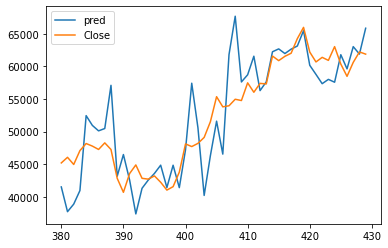

In [25]:
plt.plot(df['Scaled_pred'][380:430], label='pred')
plt.plot(df["Close"][380:430], label='Close')
plt.legend()
plt.show()

In [26]:
commission = 0.00
def long_equity(prediction, close):
    long = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] > close[i-1]:
            long.append(close[i] - close[i-1] - close[i-1]*commission)
        else:
            long.append(0)
    return long

def short_equity(prediction, close):
    short = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] < close[i-1]:
            short.append(close[i-1] - close[i] - close[i-1]*commission)
        else:
            short.append(0)
    return short  

def total_equity(prediction, close):
    total = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] > close[i-1]:
            total.append(close[i] - close[i-1] - close[i-1]*commission)
        else:
            total.append(close[i-1] - close[i] - close[i-1]*commission)
    return total

# def percentage_returns(equity):
#     equity = 0
#     for i in range(1,len(equity))

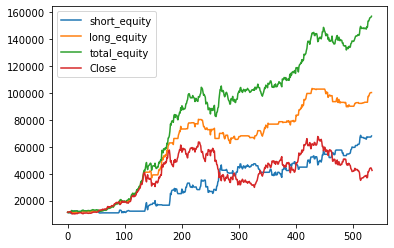

In [27]:
df_equity = pd.DataFrame()
df_equity["long_equity"] = long_equity(df["Scaled_pred"], df["Close"])
df_equity["short_equity"] = short_equity(df["Scaled_pred"], df["Close"])
df_equity["total_equity"] = total_equity(df["Scaled_pred"], df["Close"])
df_equity["short_equity"].cumsum().plot()
df_equity["long_equity"].cumsum().plot()
df_equity["total_equity"].cumsum().plot()
df["Close"].plot()
# df["Pred"].shift(-1).plot()
plt.legend()